
<img src=https://www.iteda.cnea.gov.ar/sites/default/files/garland_iteda_logo.png align='left' height=115>

<img src=https://www.facet.unt.edu.ar/facetinforma/wp-content/uploads/sites/9/2015/11/it-OP1-Transparente.png align='right' height=115>


# Análisis Estadístico de Datos


# Probabilidad de un bin

Comparo la probabilidad exacta con la aproximada: \
$p_i = \int_{x_i}^{x_{i+1}} f(u) \, du \approx f(\hat{x}_i) \, \Delta x$ \
La aproximación no es buena con solo 5 bines pero mejora para 10 bines.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### Bines del histograma

In [2]:
xmin, xmax = -5, 5

In [3]:
nbins = 21

In [4]:
bin_edges = np.linspace(xmin, xmax, nbins+1)
print(f'Bordes de los bines = {bin_edges}')

Bordes de los bines = [-5.         -4.52380952 -4.04761905 -3.57142857 -3.0952381  -2.61904762
 -2.14285714 -1.66666667 -1.19047619 -0.71428571 -0.23809524  0.23809524
  0.71428571  1.19047619  1.66666667  2.14285714  2.61904762  3.0952381
  3.57142857  4.04761905  4.52380952  5.        ]


In [5]:
xbin = ( bin_edges[:-1] + bin_edges[1:] ) / 2
print(f'Centros de los bines = {xbin}')

Centros de los bines = [-4.76190476 -4.28571429 -3.80952381 -3.33333333 -2.85714286 -2.38095238
 -1.9047619  -1.42857143 -0.95238095 -0.47619048  0.          0.47619048
  0.95238095  1.42857143  1.9047619   2.38095238  2.85714286  3.33333333
  3.80952381  4.28571429  4.76190476]


In [6]:
bin_width = (xmax-xmin)/nbins
print(f'Ancho de los bines = {bin_width}')

Ancho de los bines = 0.47619047619047616


### Probabilidad de los bines

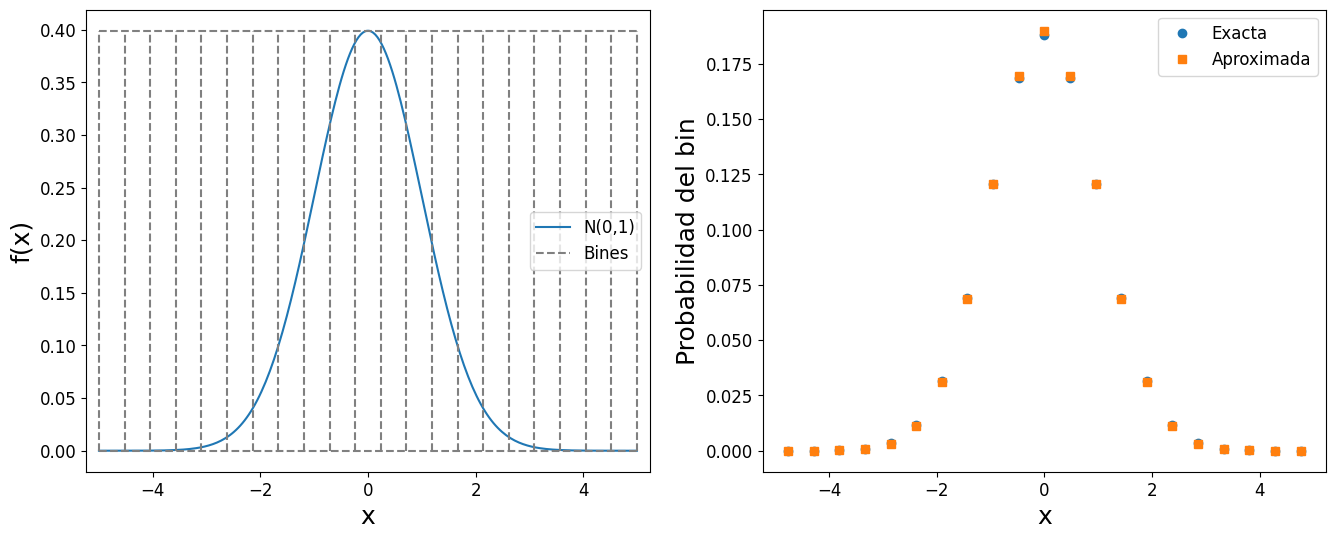

In [7]:
# genero figura y nombro a los ejes

fig = plt.figure(figsize=(16,6))
ax1, ax2 = fig.subplots(1,2)
fsize, lsize = 18, 12 # tamaño de fuentes
ax1.set_xlabel('x', fontsize=fsize)
ax1.set_ylabel('f(x)', fontsize=fsize)
ax2.set_xlabel('x', fontsize=fsize)
ax2.set_ylabel('Probabilidad del bin', fontsize=fsize)

# limites de la figura
xleft = xmin - 0.5*bin_width
xright = xmax + 0.5*bin_width
ax1.set_xlim(xleft, xright); ax2.set_xlim(xleft, xright)
ax1.tick_params(axis='both', which='major', labelsize=lsize)
ax2.tick_params(axis='both', which='major', labelsize=lsize)

# PDF N(0,1)
x = np.linspace(xmin, xmax, 256)
ax1.plot(x, norm.pdf(x), label='N(0,1)')
ymax = norm.pdf(0)
ax1.plot(bin_edges, np.full_like(bin_edges, 0), color='gray', ls='--', label='Bines')
ax1.plot(bin_edges, np.full_like(bin_edges, ymax), color='gray', ls='--')
ax1.vlines(bin_edges, 0, ymax, color='gray', ls='--',)

# probabilidad exacta
cum_proba = norm.cdf(bin_edges)
pbin1 = cum_proba[1:] - cum_proba[:-1]
ax2.plot(xbin, pbin1, 'o', drawstyle='steps-mid', label='Exacta')

# probabilidad aproximada
pbin2 = norm.pdf(xbin)*bin_width
ax2.plot(xbin, pbin2, 's', drawstyle='steps-mid', label='Aproximada')
ax1.legend(fontsize=lsize)
ax2.legend(fontsize=lsize)
plt.show()
